# **1. Data Analysis/Visualization**

In [0]:

import sklearn
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Load Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Load csv data using pandas
data = pd.read_csv("/content/drive/My Drive/Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [0]:
# Delete empty columns 
del data['airline_sentiment_gold']
del data['negativereason_gold']
del data['tweet_coord']

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment vs Count ')

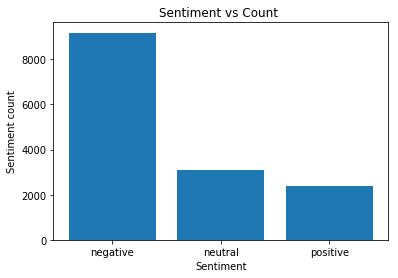

In [5]:
# Count comments negative/neutral/positive (Lightly biased)
sentiment_count = data['airline_sentiment'].value_counts()
print(sentiment_count)


# Plot sentiments v.s Number of each sentiment 
plt.bar([1,2,3], sentiment_count)
plt.xticks([1,2,3], ['negative', 'neutral', 'positive'])
plt.ylabel('Sentiment count')
plt.xlabel('Sentiment')
plt.title('Sentiment vs Count ')



In [0]:
# Negative sentiment: removing words that are website, @ ,and RT
df_neg = data[data['airline_sentiment']=='negative']
neg_reasons = ' '.join(df_neg['text'])
cleaned_words = ' '.join([word for word in neg_reasons.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

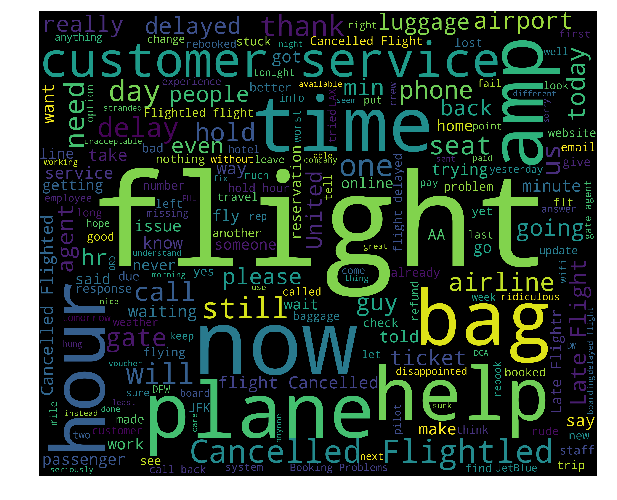

In [7]:
# Visual wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words)


plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

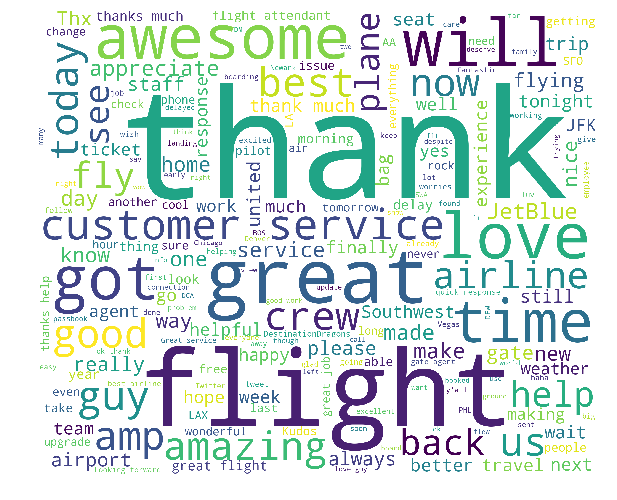

In [8]:
# For pos and neutral
df_pos = data[data['airline_sentiment']=='positive']
pos_reasons = ' '.join(df_pos['text'])
cleaned_words_pos = ' '.join([word for word in pos_reasons.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_pos)


plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


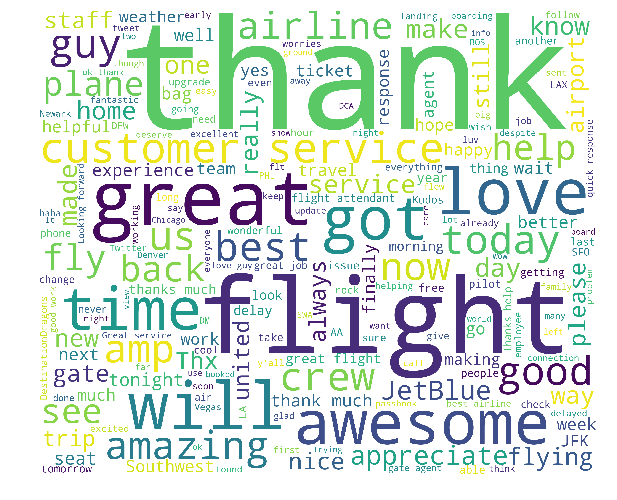

In [9]:

df_neutral = data[data['airline_sentiment']=='neutral']
neutral_reasons = ' '.join(df_pos['text'])
cleaned_words_pos = ' '.join([word for word in neutral_reasons.split() if 'http' not in word and not word.startswith('@') and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_pos)


plt.figure(1,figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
# Airline  
print(data['airline'].value_counts())

# negative reasons
reasons = data['negativereason'].dropna()
print(reasons.value_counts())

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


# 2. Data Preprocessing

In [0]:
import re 
import nltk
import html 


In [0]:
#Removing twitter @
def remove_pattern(input_txt, pattern): 
    r = re.findall(pattern, input_txt)
    for i in r: 
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [0]:
# removes http, special characters, numbers, punctuation
def clean_data(data): 
    data = data.str.replace('http?://[A-Za-z0-9./]+', " ")
    data = data.str.replace("[^a-zA-Z#]", " ")
    
    # removes short words/connectives
    data = data.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    return data

In [14]:
# Cleaning
data['clean_tweets'] = np.vectorize(remove_pattern)(data['text'], "@[\w]*")
data['clean_tweets'] = clean_data(data['clean_tweets'])
print(data['clean_tweets'])

0                                                What said
1                  plus added commercials experience tacky
2              didn today Must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                       really thing about
5        seriously would flight seats that didn have th...
6                         nearly every time this worm away
7        Really missed prime opportunity Without Hats p...
8                                                Well didn
9                          amazing arrived hour early good
10       know that suicide second leading cause death a...
11       pretty graphics much better than minimal icono...
12       This such great deal Already thinking about tr...
13       flying your #fabulous #Seductive skies again t...
14                                                  Thanks
15                                          schedule still
16       excited first cross country flight heard nothi.

In [15]:
# Tokenize
data['token'] = data['clean_tweets'].apply(lambda x : x.split())
print(data['token'])

0                                             [What, said]
1            [plus, added, commercials, experience, tacky]
2        [didn, today, Must, mean, need, take, another,...
3        [really, aggressive, blast, obnoxious, enterta...
4                                   [really, thing, about]
5        [seriously, would, flight, seats, that, didn, ...
6                  [nearly, every, time, this, worm, away]
7        [Really, missed, prime, opportunity, Without, ...
8                                             [Well, didn]
9                    [amazing, arrived, hour, early, good]
10       [know, that, suicide, second, leading, cause, ...
11       [pretty, graphics, much, better, than, minimal...
12       [This, such, great, deal, Already, thinking, a...
13       [flying, your, #fabulous, #Seductive, skies, a...
14                                                [Thanks]
15                                       [schedule, still]
16       [excited, first, cross, country, flight, heard.

In [16]:
# converting words to stem word 
from nltk.stem.porter import * 
def stemming(tokenized_tweet): 
    stemmer = PorterStemmer() 
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
    for i in range(len(tokenized_tweet)): 
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    return tokenized_tweet
  
data['stemming'] = stemming(data['token'])
data['stemming']

0                                                what said
1                             plu ad commerci experi tacki
2                didn today must mean need take anoth trip
3        realli aggress blast obnoxi entertain your gue...
4                                       realli thing about
5        serious would flight seat that didn have thi p...
6                          nearli everi time thi worm away
7        realli miss prime opportun without hat parodi ...
8                                                well didn
9                               amaz arriv hour earli good
10       know that suicid second lead caus death among ...
11       pretti graphic much better than minim iconographi
12       thi such great deal alreadi think about trip h...
13       fli your #fabul #seduct sky again take #stress...
14                                                   thank
15                                           schedul still
16       excit first cross countri flight heard noth gr.

# 3. Training 

In [17]:
# Randomizing
np.random.seed(42)
data.sample(frac=1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,clean_tweets,token,stemming
4794,569731104070115329,positive,1.0000,NaN,NaN,Southwest,JasmineDT,1,@SouthwestAir you're my early frontrunner for ...,2015-02-22 21:30:54 -0800,Washington D.C.,Eastern Time (US & Canada),early frontrunner best airline #oscars,"[early, frontrunner, best, airline, #oscars]",earli frontrunn best airlin #oscar
10480,569263373092823040,negative,1.0000,Cancelled Flight,1.0000,US Airways,ElizabethFrayer,0,@USAirways how is it that my flt to EWR was Ca...,2015-02-21 14:32:19 -0800,NaN,NaN,that Cancelled Flightled flts from USAirways s...,"[that, Cancelled, Flightled, flts, from, USAir...",that cancel flightl flt from usairway still fli
8067,568818669024907264,negative,1.0000,Late Flight,0.6770,Delta,The_Radifier,0,@JetBlue what is going on with your BDL to DCA...,2015-02-20 09:05:13 -0800,"Arlington, VA",Atlantic Time (Canada),what going with your flights yesterday today e...,"[what, going, with, your, flights, yesterday, ...",what go with your flight yesterday today everi...
8880,567775864679456768,neutral,1.0000,NaN,NaN,Delta,rnlewisjr,0,@JetBlue do they have to depart from Washingto...,2015-02-17 12:01:29 -0800,"iPhone: 60.495510,-151.064590",Alaska,they have depart from Washington,"[they, have, depart, from, Washington]",they have depart from washington
8292,568526521910079488,negative,0.6625,Customer Service Issue,0.3394,Delta,beantoon,0,@JetBlue I can probably find some of them. Are...,2015-02-19 13:44:20 -0800,"Plymouth, MA",NaN,probably find some them ticket there,"[probably, find, some, them, ticket, there]",probabl find some them ticket there
927,570008443626647552,negative,1.0000,Can't Tell,0.3477,United,kabell87,0,@united still waiting to hear back. My wallet ...,2015-02-23 15:52:57 -0800,NaN,NaN,still waiting hear back wallet stolen from you...,"[still, waiting, hear, back, wallet, stolen, f...",still wait hear back wallet stolen from your p...
3165,568622671287566336,negative,1.0000,Cancelled Flight,0.6871,United,stephaniefoos,0,@united Yes my flight was rebooked. I'm just l...,2015-02-19 20:06:23 -0800,"Boston, MA",Alaska,flight rebooked just losing trust want anywher...,"[flight, rebooked, just, losing, trust, want, ...",flight rebook just lose trust want anywher time
7894,569076569983086592,neutral,1.0000,NaN,NaN,Delta,theycallme_HH,0,@JetBlue Thank you ! What about Paris ? Could ...,2015-02-21 02:10:01 -0800,Orleans/Tarpon Springs/London,Amsterdam,Thank What about Paris Could arrange something...,"[Thank, What, about, Paris, Could, arrange, so...",thank what about pari could arrang someth from...
2818,568884344221081600,negative,0.6869,Can't Tell,0.3434,United,andreamvdlg,0,"@united not 100% sure, however my ticket inclu...",2015-02-20 13:26:11 -0800,Edinbrah,Eastern Time (US & Canada),sure however ticket included checked therefore...,"[sure, however, ticket, included, checked, the...",sure howev ticket includ check therefor thi ch...
9145,570119853312311296,positive,1.0000,NaN,NaN,US Airways,GrahamHaigh,0,@usairways great crew for flight 504 PHX to YV...,2015-02-23 23:15:40 -0800,"Vancouver, Canada",Pacific Time (US & Canada),great crew flight tonight Friendly efficient A...,"[great, crew, flight, tonight, Friendly, effic...",great crew flight tonight friendli effici awesom


In [0]:
from fastai.text import *

# data for classification model
df = data[['airline_sentiment', 'text']]
train, valid = train_test_split(df,
                                stratify=df['airline_sentiment'],
                                test_size = 0.1, random_state=43)

# data for language model 
col_names = ['labels', 'text']
df_lm = pd.DataFrame({'text': data['text'], 'labels': [0]*len(df)}, columns=col_names)
print(df_lm)
    
train_lm, valid_lm = train_test_split(df_lm, 
                                test_size = 0.1, random_state=43)

# language model 
data_lm = TextLMDataBunch.from_df(train_df = train_lm, valid_df = valid_lm, path="")

# classification model 
data_clas = TextClasDataBunch.from_df(path="", train_df = train, valid_df = valid, vocab=data_lm.train_ds.vocab, bs=32 )



In [19]:


learn = text.learner.language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.766710,4.083226,0.245585,00:10


In [20]:
# save learner 
learn.save_encoder('ft_enc')

# unfreeze
learn.unfreeze()
lr = 1e-2

# perform and plot to find optimal learning rate 
learn.lr_find(lr/1000)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


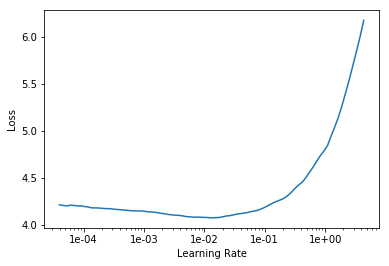

In [21]:

learn.recorder.plot()
learn.save_encoder('ft_enc2')

In [22]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc2')
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


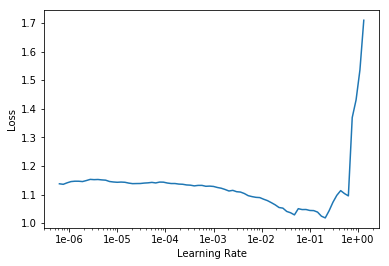

In [23]:

learn.recorder.plot()

In [24]:
learn.fit_one_cycle(1, 1e-1) # Accuracy around 70%

epoch,train_loss,valid_loss,accuracy,time
0,0.752088,0.623096,0.717896,00:08
